# WeatherPy
----

### Analysis

* Latitude vs. Max Temp: Weather is generally warmer in the southern hemispehere, and +/- 20 degrees from the equator. Interestingly, the weather in the northern hemisphere is significantly lower than the southern hemisphere during this time of year. 
* Latitude vs. Humidity: There is no strong relationship between latitude and humidity. It is interesting to observe that humidity ranges from 20-100% in both the northern and southern hemispheres at this time.
* Latitude vs. Cloudiness: There is no strong relationship between latitude and cloudiness. However, there is a strong band of cities that resides at 0 and 90% cloudiness.
* Latitude vs. Wind Speed: There is no strong relationship between latitude and wind speed. It is interesting to note that a good number of cities in both northern and southern hemispheres have low wind speeds, between 0-15 mph. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

### Performed API Calls
* Created a new DataFrame to store cities and added empty columns 
* Created for loop to add results from response to columns


In [70]:
# create new DataFrame with cities 
cities_df = pd.DataFrame(cities)
cities_df.head()

,0
0,belushya guba
1,vaini
2,qaanaaq
3,ushuaia
4,ballina


In [68]:
# add empty columns 
weather_df = cities_df.rename(columns={0: "City"})
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Cloudiness"] = ""
weather_df["Humidity"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

print("Beginning Data Retrieval")
print("------------------------")

# for loop to interate each row in index 
for index, row in weather_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?" 
    
    city = row["City"]
    index = index
    total = len(weather_df["City"])
    city_name = city.replace(" ", "+")
    
    query_url = base_url + "appid=" + api_key + "&units=imperial&q=" + city_name
    
    response = requests.get(query_url).json()

    # create conditionals for weather data retrieval for each city 
    if response["cod"] == "404":
        
        # show error message
        error_message = response["message"]
        print("City not found. Skipping..")
        
    
    else:
        # add values to columns 
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Latitude"] = response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]

        print(f"Processing record for {index} out of {total} | {city}") 

print("------------------------")
print("Data Retrival Complete")
print("------------------------")  


Beginning Data Retrieval
------------------------
City not found. Skipping..
Processing record for 1 out of 572 | vaini
Processing record for 2 out of 572 | qaanaaq
Processing record for 3 out of 572 | ushuaia
Processing record for 4 out of 572 | ballina
Processing record for 5 out of 572 | lavrentiya
Processing record for 6 out of 572 | avarua
Processing record for 7 out of 572 | hobart
Processing record for 8 out of 572 | mataura
Processing record for 9 out of 572 | busselton
Processing record for 10 out of 572 | saint-pierre
Processing record for 11 out of 572 | punta arenas
Processing record for 12 out of 572 | san patricio
Processing record for 13 out of 572 | jiuquan
Processing record for 14 out of 572 | east london
Processing record for 15 out of 572 | tasiilaq
Processing record for 16 out of 572 | rikitea
Processing record for 17 out of 572 | tuktoyaktuk
Processing record for 18 out of 572 | butaritari
Processing record for 19 out of 572 | komsomolskiy
Processing record for 20 

Processing record for 179 out of 572 | beira
Processing record for 180 out of 572 | belaya gora
Processing record for 181 out of 572 | georgetown
City not found. Skipping..
Processing record for 183 out of 572 | kavieng
Processing record for 184 out of 572 | porto novo
Processing record for 185 out of 572 | kaitangata
Processing record for 186 out of 572 | novomykolayivka
Processing record for 187 out of 572 | beloha
Processing record for 188 out of 572 | vila
Processing record for 189 out of 572 | vilcun
Processing record for 190 out of 572 | rasht
Processing record for 191 out of 572 | itarema
City not found. Skipping..
Processing record for 193 out of 572 | agirish
Processing record for 194 out of 572 | broken hill
Processing record for 195 out of 572 | los andes
Processing record for 196 out of 572 | ilhabela
Processing record for 197 out of 572 | carupano
Processing record for 198 out of 572 | lazeshchyna
Processing record for 199 out of 572 | qasigiannguit
Processing record for 2

Processing record for 357 out of 572 | shelburne
Processing record for 358 out of 572 | hasaki
Processing record for 359 out of 572 | muros
Processing record for 360 out of 572 | medea
Processing record for 361 out of 572 | nanortalik
Processing record for 362 out of 572 | gacko
Processing record for 363 out of 572 | myitkyina
Processing record for 364 out of 572 | choix
Processing record for 365 out of 572 | sokolo
Processing record for 366 out of 572 | lompoc
City not found. Skipping..
Processing record for 368 out of 572 | gvardeyskoye
Processing record for 369 out of 572 | padang
Processing record for 370 out of 572 | tilichiki
Processing record for 371 out of 572 | ureki
Processing record for 372 out of 572 | nanakuli
Processing record for 373 out of 572 | toba
Processing record for 374 out of 572 | dunda
Processing record for 375 out of 572 | christchurch
Processing record for 376 out of 572 | biak
Processing record for 377 out of 572 | huarmey
City not found. Skipping..
Processi

Processing record for 537 out of 572 | santa cruz
Processing record for 538 out of 572 | quesnel
Processing record for 539 out of 572 | xichang
Processing record for 540 out of 572 | pangnirtung
Processing record for 541 out of 572 | talpa
Processing record for 542 out of 572 | astana
Processing record for 543 out of 572 | ola
City not found. Skipping..
Processing record for 545 out of 572 | volksrust
Processing record for 546 out of 572 | iwaki
City not found. Skipping..
Processing record for 548 out of 572 | luanda
Processing record for 549 out of 572 | katobu
Processing record for 550 out of 572 | sorong
Processing record for 551 out of 572 | oga
Processing record for 552 out of 572 | xuzhou
Processing record for 553 out of 572 | suntar
Processing record for 554 out of 572 | piet retief
Processing record for 555 out of 572 | tanout
Processing record for 556 out of 572 | kahului
Processing record for 557 out of 572 | la ronge
Processing record for 558 out of 572 | gao
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:
weather_df

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,belushya guba,,,,,,,,
1,vaini,IN,1553990400,32,94,15.34,74.49,69.8,1.92
2,qaanaaq,GL,1553995622,8,79,77.48,-69.36,-8.9,6.73
3,ushuaia,AR,1553990400,40,76,-54.81,-68.31,50,5.82
4,ballina,IE,1553995091,20,76,54.11,-9.15,41,11.01
5,lavrentiya,RU,1553995623,48,92,65.58,-170.99,33.94,21.94
6,avarua,CK,1553995567,80,100,-21.21,-159.78,78.94,27.65
7,hobart,AU,1553995454,75,62,-42.88,147.33,57.99,17.22
8,mataura,NZ,1553995623,0,50,-46.19,168.86,74.8,10.09
9,busselton,AU,1553995524,64,25,-33.64,115.35,73.99,18.25


In [71]:
# replace empty columns with nan 
weather_df["Country"].replace('', np.nan, inplace=True)

In [72]:
# drop columns with na 
weather_df = weather_df.dropna()

In [73]:
# check length for all columns 
weather_df.count()

City          514
Country       514
Date          514
Cloudiness    514
Humidity      514
Latitude      514
Longitude     514
Max Temp      514
Wind Speed    514
dtype: int64

### Plotting the Data
* Plot to see relationships between Latitude and Temperature, Latitude and Humidity, Latitude and Cloudiness, and Latitude and Wind Speed

#### Latitude vs. Temperature Plot

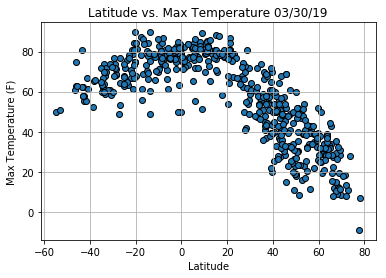

In [89]:
# create variable for date 
t = time.strftime("%x")

plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], edgecolors='black')
plt.title(f"Latitude vs. Max Temperature {t}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()


# save figure
plt.savefig("Images/lat_vs_temp.png")

# show figure
plt.show()

#### Latitude vs. Humidity Plot

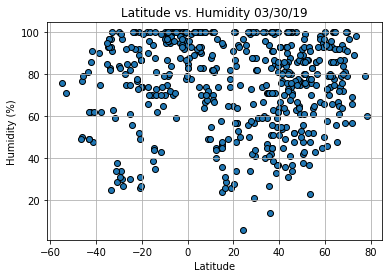

In [90]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors='black')
plt.title(f"Latitude vs. Humidity {t}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# save figure
plt.savefig("Images/lat_vs_humidity.png")

# show figure
plt.show()

#### Latitude vs. Cloudiness Plot

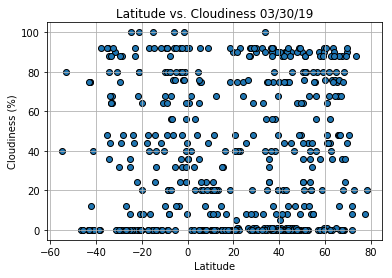

In [91]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors='black')
plt.title(f"Latitude vs. Cloudiness {t}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# save figure 
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

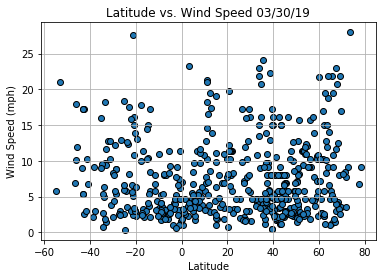

In [93]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors='black')
plt.title(f"Latitude vs. Wind Speed {t}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# save figure 
plt.savefig("Images/lat_vs_windspeed.png")


# show figure
plt.show()